In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import math

from glob import glob
from scipy import ndimage
from skimage import img_as_float, io
import imageio
import json

In [2]:
big_img = img_as_float(io.imread('C:/Users/jv92c/Documents/mFISH/sample_data/DAPI_Overview.tif'))

In [3]:
x, y = big_img.shape
print(x/2048) # how many horizontal tiles
print(y/2048) # how many vertical tiles

x_step = math.ceil(x/2048)
y_step = math.ceil(y/2048)

print(x_step)
print(y_step)

10.5
9.5498046875
11
10


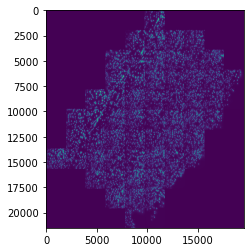

In [4]:
plt.imshow(big_img)

using a 2048 x 2048 pixel FOV, we will slide across the image to capture each fragment. Each image tile should have a small overlap with adjacent tiles, for later use in identifying nuclei that are relegated to the tile edges. This should work similar to a sliding window, but should only need array slicing to keep things simple.

In [9]:
for i in range(x_step):
    
    j = 0
    
    while i != x_step:
        
        big_img[0:2048:i, 0:2048]
        
    else i == x_step:
        
        big_img[0:2048:i, 0:2048]
        
    
        

10.5

In [ ]:
# numpy meshgrid

In [6]:
np.arange(1,11,1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [11]:
#slice intervals
tile_step = 100

#size of the 2D slice
#also determines the overlap between FOVs for use in stitching of edge objects
tile_size = 120

#range in the x-direction determined by width of image; row length
tile_range_r = np.arange(0, big_img.shape[0],tile_step)

#range in the y-direction determined by height; column height
tile_range_c = np.arange(0, big_img.shape[1],tile_step)

xs, ys = np.meshgrid(tile_range_r, tile_range_c)

plt.figure()

for ii, thing in enumerate(xs.ravel()):
    
    print(str(xs.ravel()[ii]) + " "+str(ys.ravel()[ii]))
    r_min = ys.ravel()[ii]
    r_max = np.min([ys.ravel()[ii]+ tile_size, big_img.shape[1]-1])
    c_min = xs.ravel()[ii]
    c_max = np.min([xs.ravel()[ii]+ tile_size, big_img.shape[0]-1])
    sub_image = big_img[r_min:r_max,c_min:c_max]

0 0
100 0
200 0
300 0
400 0
500 0
600 0
700 0
800 0
900 0
1000 0
1100 0
1200 0
1300 0
1400 0
1500 0
1600 0
1700 0
1800 0
1900 0
2000 0
2100 0
2200 0
2300 0
2400 0
2500 0
2600 0
2700 0
2800 0
2900 0
3000 0
3100 0
3200 0
3300 0
3400 0
3500 0
3600 0
3700 0
3800 0
3900 0
4000 0
4100 0
4200 0
4300 0
4400 0
4500 0
4600 0
4700 0
4800 0
4900 0
5000 0
5100 0
5200 0
5300 0
5400 0
5500 0
5600 0
5700 0
5800 0
5900 0
6000 0
6100 0
6200 0
6300 0
6400 0
6500 0
6600 0
6700 0
6800 0
6900 0
7000 0
7100 0
7200 0
7300 0
7400 0
7500 0
7600 0
7700 0
7800 0
7900 0
8000 0
8100 0
8200 0
8300 0
8400 0
8500 0
8600 0
8700 0
8800 0
8900 0
9000 0
9100 0
9200 0
9300 0
9400 0
9500 0
9600 0
9700 0
9800 0
9900 0
10000 0
10100 0
10200 0
10300 0
10400 0
10500 0
10600 0
10700 0
10800 0
10900 0
11000 0
11100 0
11200 0
11300 0
11400 0
11500 0
11600 0
11700 0
11800 0
11900 0
12000 0
12100 0
12200 0
12300 0
12400 0
12500 0
12600 0
12700 0
12800 0
12900 0
13000 0
13100 0
13200 0
13300 0
13400 0
13500 0
13600 0
13700 0
13800 0


3500 1400
3600 1400
3700 1400
3800 1400
3900 1400
4000 1400
4100 1400
4200 1400
4300 1400
4400 1400
4500 1400
4600 1400
4700 1400
4800 1400
4900 1400
5000 1400
5100 1400
5200 1400
5300 1400
5400 1400
5500 1400
5600 1400
5700 1400
5800 1400
5900 1400
6000 1400
6100 1400
6200 1400
6300 1400
6400 1400
6500 1400
6600 1400
6700 1400
6800 1400
6900 1400
7000 1400
7100 1400
7200 1400
7300 1400
7400 1400
7500 1400
7600 1400
7700 1400
7800 1400
7900 1400
8000 1400
8100 1400
8200 1400
8300 1400
8400 1400
8500 1400
8600 1400
8700 1400
8800 1400
8900 1400
9000 1400
9100 1400
9200 1400
9300 1400
9400 1400
9500 1400
9600 1400
9700 1400
9800 1400
9900 1400
10000 1400
10100 1400
10200 1400
10300 1400
10400 1400
10500 1400
10600 1400
10700 1400
10800 1400
10900 1400
11000 1400
11100 1400
11200 1400
11300 1400
11400 1400
11500 1400
11600 1400
11700 1400
11800 1400
11900 1400
12000 1400
12100 1400
12200 1400
12300 1400
12400 1400
12500 1400
12600 1400
12700 1400
12800 1400
12900 1400
13000 1400
13100 140

19300 2700
19400 2700
19500 2700
19600 2700
19700 2700
19800 2700
19900 2700
20000 2700
20100 2700
20200 2700
20300 2700
20400 2700
20500 2700
20600 2700
20700 2700
20800 2700
20900 2700
21000 2700
21100 2700
21200 2700
21300 2700
21400 2700
21500 2700
0 2800
100 2800
200 2800
300 2800
400 2800
500 2800
600 2800
700 2800
800 2800
900 2800
1000 2800
1100 2800
1200 2800
1300 2800
1400 2800
1500 2800
1600 2800
1700 2800
1800 2800
1900 2800
2000 2800
2100 2800
2200 2800
2300 2800
2400 2800
2500 2800
2600 2800
2700 2800
2800 2800
2900 2800
3000 2800
3100 2800
3200 2800
3300 2800
3400 2800
3500 2800
3600 2800
3700 2800
3800 2800
3900 2800
4000 2800
4100 2800
4200 2800
4300 2800
4400 2800
4500 2800
4600 2800
4700 2800
4800 2800
4900 2800
5000 2800
5100 2800
5200 2800
5300 2800
5400 2800
5500 2800
5600 2800
5700 2800
5800 2800
5900 2800
6000 2800
6100 2800
6200 2800
6300 2800
6400 2800
6500 2800
6600 2800
6700 2800
6800 2800
6900 2800
7000 2800
7100 2800
7200 2800
7300 2800
7400 2800
7500 2800

20200 4100
20300 4100
20400 4100
20500 4100
20600 4100
20700 4100
20800 4100
20900 4100
21000 4100
21100 4100
21200 4100
21300 4100
21400 4100
21500 4100
0 4200
100 4200
200 4200
300 4200
400 4200
500 4200
600 4200
700 4200
800 4200
900 4200
1000 4200
1100 4200
1200 4200
1300 4200
1400 4200
1500 4200
1600 4200
1700 4200
1800 4200
1900 4200
2000 4200
2100 4200
2200 4200
2300 4200
2400 4200
2500 4200
2600 4200
2700 4200
2800 4200
2900 4200
3000 4200
3100 4200
3200 4200
3300 4200
3400 4200
3500 4200
3600 4200
3700 4200
3800 4200
3900 4200
4000 4200
4100 4200
4200 4200
4300 4200
4400 4200
4500 4200
4600 4200
4700 4200
4800 4200
4900 4200
5000 4200
5100 4200
5200 4200
5300 4200
5400 4200
5500 4200
5600 4200
5700 4200
5800 4200
5900 4200
6000 4200
6100 4200
6200 4200
6300 4200
6400 4200
6500 4200
6600 4200
6700 4200
6800 4200
6900 4200
7000 4200
7100 4200
7200 4200
7300 4200
7400 4200
7500 4200
7600 4200
7700 4200
7800 4200
7900 4200
8000 4200
8100 4200
8200 4200
8300 4200
8400 4200
8500 420

700 5600
800 5600
900 5600
1000 5600
1100 5600
1200 5600
1300 5600
1400 5600
1500 5600
1600 5600
1700 5600
1800 5600
1900 5600
2000 5600
2100 5600
2200 5600
2300 5600
2400 5600
2500 5600
2600 5600
2700 5600
2800 5600
2900 5600
3000 5600
3100 5600
3200 5600
3300 5600
3400 5600
3500 5600
3600 5600
3700 5600
3800 5600
3900 5600
4000 5600
4100 5600
4200 5600
4300 5600
4400 5600
4500 5600
4600 5600
4700 5600
4800 5600
4900 5600
5000 5600
5100 5600
5200 5600
5300 5600
5400 5600
5500 5600
5600 5600
5700 5600
5800 5600
5900 5600
6000 5600
6100 5600
6200 5600
6300 5600
6400 5600
6500 5600
6600 5600
6700 5600
6800 5600
6900 5600
7000 5600
7100 5600
7200 5600
7300 5600
7400 5600
7500 5600
7600 5600
7700 5600
7800 5600
7900 5600
8000 5600
8100 5600
8200 5600
8300 5600
8400 5600
8500 5600
8600 5600
8700 5600
8800 5600
8900 5600
9000 5600
9100 5600
9200 5600
9300 5600
9400 5600
9500 5600
9600 5600
9700 5600
9800 5600
9900 5600
10000 5600
10100 5600
10200 5600
10300 5600
10400 5600
10500 5600
10600 5

15300 6900
15400 6900
15500 6900
15600 6900
15700 6900
15800 6900
15900 6900
16000 6900
16100 6900
16200 6900
16300 6900
16400 6900
16500 6900
16600 6900
16700 6900
16800 6900
16900 6900
17000 6900
17100 6900
17200 6900
17300 6900
17400 6900
17500 6900
17600 6900
17700 6900
17800 6900
17900 6900
18000 6900
18100 6900
18200 6900
18300 6900
18400 6900
18500 6900
18600 6900
18700 6900
18800 6900
18900 6900
19000 6900
19100 6900
19200 6900
19300 6900
19400 6900
19500 6900
19600 6900
19700 6900
19800 6900
19900 6900
20000 6900
20100 6900
20200 6900
20300 6900
20400 6900
20500 6900
20600 6900
20700 6900
20800 6900
20900 6900
21000 6900
21100 6900
21200 6900
21300 6900
21400 6900
21500 6900
0 7000
100 7000
200 7000
300 7000
400 7000
500 7000
600 7000
700 7000
800 7000
900 7000
1000 7000
1100 7000
1200 7000
1300 7000
1400 7000
1500 7000
1600 7000
1700 7000
1800 7000
1900 7000
2000 7000
2100 7000
2200 7000
2300 7000
2400 7000
2500 7000
2600 7000
2700 7000
2800 7000
2900 7000
3000 7000
3100 7000

12800 8300
12900 8300
13000 8300
13100 8300
13200 8300
13300 8300
13400 8300
13500 8300
13600 8300
13700 8300
13800 8300
13900 8300
14000 8300
14100 8300
14200 8300
14300 8300
14400 8300
14500 8300
14600 8300
14700 8300
14800 8300
14900 8300
15000 8300
15100 8300
15200 8300
15300 8300
15400 8300
15500 8300
15600 8300
15700 8300
15800 8300
15900 8300
16000 8300
16100 8300
16200 8300
16300 8300
16400 8300
16500 8300
16600 8300
16700 8300
16800 8300
16900 8300
17000 8300
17100 8300
17200 8300
17300 8300
17400 8300
17500 8300
17600 8300
17700 8300
17800 8300
17900 8300
18000 8300
18100 8300
18200 8300
18300 8300
18400 8300
18500 8300
18600 8300
18700 8300
18800 8300
18900 8300
19000 8300
19100 8300
19200 8300
19300 8300
19400 8300
19500 8300
19600 8300
19700 8300
19800 8300
19900 8300
20000 8300
20100 8300
20200 8300
20300 8300
20400 8300
20500 8300
20600 8300
20700 8300
20800 8300
20900 8300
21000 8300
21100 8300
21200 8300
21300 8300
21400 8300
21500 8300
0 8400
100 8400
200 8400
300 840

14200 9800
14300 9800
14400 9800
14500 9800
14600 9800
14700 9800
14800 9800
14900 9800
15000 9800
15100 9800
15200 9800
15300 9800
15400 9800
15500 9800
15600 9800
15700 9800
15800 9800
15900 9800
16000 9800
16100 9800
16200 9800
16300 9800
16400 9800
16500 9800
16600 9800
16700 9800
16800 9800
16900 9800
17000 9800
17100 9800
17200 9800
17300 9800
17400 9800
17500 9800
17600 9800
17700 9800
17800 9800
17900 9800
18000 9800
18100 9800
18200 9800
18300 9800
18400 9800
18500 9800
18600 9800
18700 9800
18800 9800
18900 9800
19000 9800
19100 9800
19200 9800
19300 9800
19400 9800
19500 9800
19600 9800
19700 9800
19800 9800
19900 9800
20000 9800
20100 9800
20200 9800
20300 9800
20400 9800
20500 9800
20600 9800
20700 9800
20800 9800
20900 9800
21000 9800
21100 9800
21200 9800
21300 9800
21400 9800
21500 9800
0 9900
100 9900
200 9900
300 9900
400 9900
500 9900
600 9900
700 9900
800 9900
900 9900
1000 9900
1100 9900
1200 9900
1300 9900
1400 9900
1500 9900
1600 9900
1700 9900
1800 9900
1900 990

14700 11300
14800 11300
14900 11300
15000 11300
15100 11300
15200 11300
15300 11300
15400 11300
15500 11300
15600 11300
15700 11300
15800 11300
15900 11300
16000 11300
16100 11300
16200 11300
16300 11300
16400 11300
16500 11300
16600 11300
16700 11300
16800 11300
16900 11300
17000 11300
17100 11300
17200 11300
17300 11300
17400 11300
17500 11300
17600 11300
17700 11300
17800 11300
17900 11300
18000 11300
18100 11300
18200 11300
18300 11300
18400 11300
18500 11300
18600 11300
18700 11300
18800 11300
18900 11300
19000 11300
19100 11300
19200 11300
19300 11300
19400 11300
19500 11300
19600 11300
19700 11300
19800 11300
19900 11300
20000 11300
20100 11300
20200 11300
20300 11300
20400 11300
20500 11300
20600 11300
20700 11300
20800 11300
20900 11300
21000 11300
21100 11300
21200 11300
21300 11300
21400 11300
21500 11300
0 11400
100 11400
200 11400
300 11400
400 11400
500 11400
600 11400
700 11400
800 11400
900 11400
1000 11400
1100 11400
1200 11400
1300 11400
1400 11400
1500 11400
1600 114

2400 12900
2500 12900
2600 12900
2700 12900
2800 12900
2900 12900
3000 12900
3100 12900
3200 12900
3300 12900
3400 12900
3500 12900
3600 12900
3700 12900
3800 12900
3900 12900
4000 12900
4100 12900
4200 12900
4300 12900
4400 12900
4500 12900
4600 12900
4700 12900
4800 12900
4900 12900
5000 12900
5100 12900
5200 12900
5300 12900
5400 12900
5500 12900
5600 12900
5700 12900
5800 12900
5900 12900
6000 12900
6100 12900
6200 12900
6300 12900
6400 12900
6500 12900
6600 12900
6700 12900
6800 12900
6900 12900
7000 12900
7100 12900
7200 12900
7300 12900
7400 12900
7500 12900
7600 12900
7700 12900
7800 12900
7900 12900
8000 12900
8100 12900
8200 12900
8300 12900
8400 12900
8500 12900
8600 12900
8700 12900
8800 12900
8900 12900
9000 12900
9100 12900
9200 12900
9300 12900
9400 12900
9500 12900
9600 12900
9700 12900
9800 12900
9900 12900
10000 12900
10100 12900
10200 12900
10300 12900
10400 12900
10500 12900
10600 12900
10700 12900
10800 12900
10900 12900
11000 12900
11100 12900
11200 12900
11300 12

4700 14300
4800 14300
4900 14300
5000 14300
5100 14300
5200 14300
5300 14300
5400 14300
5500 14300
5600 14300
5700 14300
5800 14300
5900 14300
6000 14300
6100 14300
6200 14300
6300 14300
6400 14300
6500 14300
6600 14300
6700 14300
6800 14300
6900 14300
7000 14300
7100 14300
7200 14300
7300 14300
7400 14300
7500 14300
7600 14300
7700 14300
7800 14300
7900 14300
8000 14300
8100 14300
8200 14300
8300 14300
8400 14300
8500 14300
8600 14300
8700 14300
8800 14300
8900 14300
9000 14300
9100 14300
9200 14300
9300 14300
9400 14300
9500 14300
9600 14300
9700 14300
9800 14300
9900 14300
10000 14300
10100 14300
10200 14300
10300 14300
10400 14300
10500 14300
10600 14300
10700 14300
10800 14300
10900 14300
11000 14300
11100 14300
11200 14300
11300 14300
11400 14300
11500 14300
11600 14300
11700 14300
11800 14300
11900 14300
12000 14300
12100 14300
12200 14300
12300 14300
12400 14300
12500 14300
12600 14300
12700 14300
12800 14300
12900 14300
13000 14300
13100 14300
13200 14300
13300 14300
13400 143

13100 15700
13200 15700
13300 15700
13400 15700
13500 15700
13600 15700
13700 15700
13800 15700
13900 15700
14000 15700
14100 15700
14200 15700
14300 15700
14400 15700
14500 15700
14600 15700
14700 15700
14800 15700
14900 15700
15000 15700
15100 15700
15200 15700
15300 15700
15400 15700
15500 15700
15600 15700
15700 15700
15800 15700
15900 15700
16000 15700
16100 15700
16200 15700
16300 15700
16400 15700
16500 15700
16600 15700
16700 15700
16800 15700
16900 15700
17000 15700
17100 15700
17200 15700
17300 15700
17400 15700
17500 15700
17600 15700
17700 15700
17800 15700
17900 15700
18000 15700
18100 15700
18200 15700
18300 15700
18400 15700
18500 15700
18600 15700
18700 15700
18800 15700
18900 15700
19000 15700
19100 15700
19200 15700
19300 15700
19400 15700
19500 15700
19600 15700
19700 15700
19800 15700
19900 15700
20000 15700
20100 15700
20200 15700
20300 15700
20400 15700
20500 15700
20600 15700
20700 15700
20800 15700
20900 15700
21000 15700
21100 15700
21200 15700
21300 15700
2140

19900 17100
20000 17100
20100 17100
20200 17100
20300 17100
20400 17100
20500 17100
20600 17100
20700 17100
20800 17100
20900 17100
21000 17100
21100 17100
21200 17100
21300 17100
21400 17100
21500 17100
0 17200
100 17200
200 17200
300 17200
400 17200
500 17200
600 17200
700 17200
800 17200
900 17200
1000 17200
1100 17200
1200 17200
1300 17200
1400 17200
1500 17200
1600 17200
1700 17200
1800 17200
1900 17200
2000 17200
2100 17200
2200 17200
2300 17200
2400 17200
2500 17200
2600 17200
2700 17200
2800 17200
2900 17200
3000 17200
3100 17200
3200 17200
3300 17200
3400 17200
3500 17200
3600 17200
3700 17200
3800 17200
3900 17200
4000 17200
4100 17200
4200 17200
4300 17200
4400 17200
4500 17200
4600 17200
4700 17200
4800 17200
4900 17200
5000 17200
5100 17200
5200 17200
5300 17200
5400 17200
5500 17200
5600 17200
5700 17200
5800 17200
5900 17200
6000 17200
6100 17200
6200 17200
6300 17200
6400 17200
6500 17200
6600 17200
6700 17200
6800 17200
6900 17200
7000 17200
7100 17200
7200 17200
7300 

9400 18700
9500 18700
9600 18700
9700 18700
9800 18700
9900 18700
10000 18700
10100 18700
10200 18700
10300 18700
10400 18700
10500 18700
10600 18700
10700 18700
10800 18700
10900 18700
11000 18700
11100 18700
11200 18700
11300 18700
11400 18700
11500 18700
11600 18700
11700 18700
11800 18700
11900 18700
12000 18700
12100 18700
12200 18700
12300 18700
12400 18700
12500 18700
12600 18700
12700 18700
12800 18700
12900 18700
13000 18700
13100 18700
13200 18700
13300 18700
13400 18700
13500 18700
13600 18700
13700 18700
13800 18700
13900 18700
14000 18700
14100 18700
14200 18700
14300 18700
14400 18700
14500 18700
14600 18700
14700 18700
14800 18700
14900 18700
15000 18700
15100 18700
15200 18700
15300 18700
15400 18700
15500 18700
15600 18700
15700 18700
15800 18700
15900 18700
16000 18700
16100 18700
16200 18700
16300 18700
16400 18700
16500 18700
16600 18700
16700 18700
16800 18700
16900 18700
17000 18700
17100 18700
17200 18700
17300 18700
17400 18700
17500 18700
17600 18700
17700 1870

<Figure size 432x288 with 0 Axes>